In [ ]:
# This copy attempting to plot stations over time
# We appear to be missing some data.
# Need to get the 122000 file into the cleaned dataframe

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sbn
from scipy import stats

In [2]:
firefile = './output/cleaned_formatted_fire_data.csv'
df = pd.read_csv(firefile, skip_blank_lines=True, encoding='UTF-8')
df.dtypes


OBJECTID                       int64
address                       object
address2                      object
apt_room                      object
arrive_date_time              object
cleared_date_time             object
dispatch_date_time            object
exposure                       int64
incident_number               object
incident_type                  int64
incident_type_description     object
platoon                       object
station                        int64
Longitude                    float64
Latitude                     float64
dtype: object

In [3]:
df['Year'] = pd.DatetimeIndex(df['dispatch_date_time']).year


In [4]:
df['Date'] = df['dispatch_date_time'].str.split(' ',expand=True)[0]

In [6]:
df['dispatch_date_time'] = pd.to_datetime(df['dispatch_date_time'])
df['cleared_date_time'] = pd.to_datetime(df['cleared_date_time'])
df['arrive_date_time'] = pd.to_datetime(df['arrive_date_time'])
df.dtypes

OBJECTID                              int64
address                              object
address2                             object
apt_room                             object
arrive_date_time             datetime64[ns]
cleared_date_time            datetime64[ns]
dispatch_date_time           datetime64[ns]
exposure                              int64
incident_number                      object
incident_type                         int64
incident_type_description            object
platoon                              object
station                               int64
Longitude                           float64
Latitude                            float64
Year                                  int64
Date                                 object
dtype: object

In [28]:
df.groupby(df['station']).Date.count()

station
0         1
1     11135
2      3680
3      6063
4      3326
5      4710
6      4804
7      4563
8      6188
9      4921
10     3611
11     7532
12     7010
13        1
14     4330
15     6571
16     4556
17     3900
18     3389
19     6001
20     4597
21     3765
22     4750
23     2806
24     3933
25     2597
26     2984
27     1653
28     1561
29      252
Name: Date, dtype: int64

In [7]:
# Calculating the time from dispatch to cleared in minutes and in seconds
df['Clear Time'] = (df['cleared_date_time'] - df['dispatch_date_time'])
df['Clear Time'] = pd.to_timedelta(df['Clear Time'])
df['Seconds'] = df['Clear Time'].dt.total_seconds()


In [8]:
df.head()

,OBJECTID,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,incident_type_description,platoon,station,Longitude,Latitude,Year,Date,Clear Time,Seconds
0,474768,"1216 BEVERLY DR RALEIGH, NC 27601",NaN,,2007-08-21 22:52:00,2007-08-21 22:58:00,2007-08-21 22:47:00,0,07-0023051,444,Power line down,A,12,-78.595422,35.761213,2007,2007-08-21,00:11:00,660.0
1,474769,"8332 SHILOH CREEK CT RALEIGH, NC 27603",NaN,,2013-10-19 21:52:00,2013-10-19 21:59:00,2013-10-19 21:47:00,0,13-0030918,150,Outside rubbish fire Other,B,22,-78.537320,35.891622,2013,2013-10-19,00:12:00,720.0
2,474770,"7513 IDOLBROOK LN RALEIGH, NC 27615",NaN,,2014-02-14 21:49:00,2014-02-14 21:51:00,2014-02-14 21:46:00,0,14-0004846,510,Person in distress Other,A,4,-78.647631,35.878186,2014,2014-02-14,00:05:00,300.0
3,474771,"1205 S BLOODWORTH ST RALEIGH, NC 27601",NaN,,2012-04-29 05:17:00,2012-04-29 05:38:00,2012-04-29 05:16:00,0,12-0011779,440,Electrical wiring/equipment problem Other,A,1,-78.633977,35.765388,2012,2012-04-29,00:22:00,1320.0
4,474772,"7628 VALVIEW ST RALEIGH, NC 27601",NaN,,2012-04-28 23:46:00,2012-04-28 23:52:00,2012-04-28 23:43:00,0,12-9010131,561,Unauthorized burning,A,18,-78.691396,35.884447,2012,2012-04-28,00:09:00,540.0


In [99]:
# There appear to be some funky clearance times, possibly human error
outlier = df.loc[df['Clear Time']==df['Clear Time'].max()]
outlier

,OBJECTID,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,incident_type_description,platoon,station,Longitude,Latitude,Year,Date,Clear Time,Seconds
62015,551758,"6131 FALLS OF NEUSE RD RALEIGH, NC 27604",SPRINGFIELD ONE,NaN,2007-03-17 15:14:00,2007-03-22 15:25:00,2007-03-17 15:05:00,0,07-0007359,745,Alarm system activation no fire - unintentional,B,4,-78.620388,35.865329,2007,2007-03-17,5 days 00:20:00,433200.0


In [48]:
df_year = df.groupby(['Year','station'])
df_year['station'].count()

Year  station
2007  0             1
      1           964
      2           292
      3           602
      4           333
      5           544
      6           479
      7           468
      8           644
      9           470
      10          314
      11          771
      12          644
      14          450
      15          509
      16          483
      17          329
      18          347
      19          594
      20          416
      21          328
      22          454
      23          342
      24          386
      25          217
      26          227
      27          172
      28           79
2008  1          1011
      2           356
                 ... 
2017  26          229
      27          157
      28          154
      29           85
2018  1           176
      2            20
      3            17
      4            10
      5            17
      6            13
      7            62
      8            31
      9            76
      10          

In [45]:
year_station = pd.DataFrame(df_year['OBJECTID'].count())

year_station = year_station.reset_index()

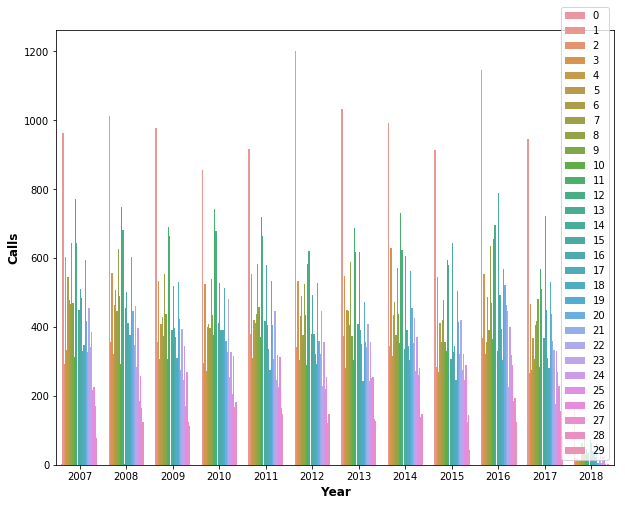

In [47]:
sbn.barplot(data=year_station, x='Year', y='OBJECTID', hue='station')
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(-60,45)
fig.xlimit=(-65,85)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Calls', fontsize=12, fontweight='bold')
# plt.title('title')", fontsize=14, fontweight='bold')
plt.legend(loc='best')
# plt.savefig('./data/fig1.png')